# Analiza skupień krajów Europy pod względem liczby palaczy

# Autorzy
Adam Dohojda, Kacper Kiereś, Dawid Koceniak, Wiktoria Stęczna

# Streszczenie
W tym projekcie dokonujemy analizy skupień krajów Europy pod względem nawyku  palenia papierosów przez obywateli. Chcemy określić, które państwa mają zbliżone właściwości statystyczne w zakresie zwyczajów palenia, dzieląc je na klastry.
W pracy tej skupiliśmy się na selekcji, wizualizacji zebranych zmiennych dot. częstości palenia w krajach europejskich, opisaniu ich za pomocą statystyk opisowych, standaryzacji i poddaniu zabiegom klasteryzacji przy użyciu modeli z biblioteki sci-kit learn języka Python. Następnie jakość podziałów została oceniona metodą wizualną, jak i szeregiem miar opisujących jakość klastrowania, by na koniec wybrać najskuteczniejszą metodę dzielenia państw europejskich na skupienia z podobnymi nawykami odnośnie spożywania wyrobów tytoniowych wewnątrz klastrów. Wybrany podział dokonany został przy użyciu optymalnej metody klastrowania, jak i odpowiedniej liczby klastrów. Na koniec podejmujemy próbę interpretacji wyników, żeby ocenić merytoryczny skład skupień.


# Słowa kluczowe
- klastrowanie
- palenie
- dobór metod
- nawyki palenia
- podział obiektów

# Wprowadzenie
Palenie papierosów, czyli nikotynizm jest uzależnieniem fizycznym oraz psychicznym i jako taki został szczegółowo opisany w Międzynarodowej Klasyfikacji Chorób i Problemów Zdrowotnych ICD 10.

Epidemia palenia tytoniu jest jednym z największych zagrożeń dla zdrowia publicznego na świecie, zabijając ponad 8 milionów ludzi rocznie. Ponad 7 milionów z tych zgonów jest wynikiem bezpośredniego używania tytoniu, podczas gdy około 1,3 miliona jest wynikiem narażenia osób niepalących na tak zwane palenie bierne.

Wszystkie formy palenia tytoniu są szkodliwe i nie ma bezpiecznego poziomu ekspozycji na tytoń. Palenie papierosów jest najbardziej rozpowszechnioną formą palenia tytoniu na świecie i to właśnie ten problem postanowiliśmy zbadać w naszej pracy.

# Przedmiot badania

Przedmiotem niniejszego badania jest kompleksowa analiza nawyku palenia papierosów wśród krajów europejskich, z zastosowaniem metody analizy skupień. Postaramy się zidentyfikować podobieństwa i różnice w wzorcach palenia papierosów między różnymi krajami, co pozwoli na wyodrębnienie klastrów o podobnych charakterystykach palenia. Badanie obejmuje szereg wizualizacji, począwszy od wykresów gęstości każdej zmiennej, kończąc na wykresach samych klastrów w różnych wariantach.



## Cel i zakres badania

Celem niniejszego badania jest zrozumienie zróżnicowania nawyku palenia papierosów wśród krajów europejskich poprzez zastosowanie analizy skupień. Metody wykorzystane w pracy to m.in. metoda k-średnich, grupowanie hierarchiczne czy Gaussian Mixture.

Kraje, które zostały wybrane do analizy to: Belgia, Bułgaria, Czechy, Dania, Niemcy, Estonia, Irlandia, Grecja, Hiszpania, Francja, Chorwacja, Włochy, Cypr, Łotwa, Litwa, Luksemburg, Węgry, Malta, Niderlandy, Austria, Polska, Portugalia, Rumunia, Słowenia, Słowacja, Finlandia, Szwecja, Islandia, Norwegia, Unia Europejska, Serbia, Turcja. Analizowane dane pochodzą z 2019 roku.

W celu wyłonienia najlepszej metody podziału obiektów na skupienia wykorzystano 3 wskaźniki(Caliński - Harabsz Index, Davies-Bouldin Index, Silhouette Coefficient) obliczonych dla każdej z wybranych metod i zróżnicowanej liczby klastrów(od 2 do 10).

## Przegląd literatury

Temat problemu palenia papierosów w Europie został poruszony w pracy ,,Smoking epidemic in Europe in the 21st century" z 2020 roku autorów F. Janssen, S. El Gewily, A. Bardoutsos. Badacze, na kanwie poprzedniego, podobnego badania zdecydowali się na obliczenie ,,smoking-attributable mortality fractions" - SAMF, czyli wskaźniki śmiertelności palaczy i zaprognozowanie ich do roku 2100. Wskaźniki zostały policzone dla  29 europejskich krajów z podziałem na płcie - badani mężczyźni byli w wieku 35-84 lat, a kobiety w wieku 40-84 lat.

Autorzy wykorzystali w badaniu metodę Peto-Lopeza, która wykorzystuje krajowe współczynniki śmiertelności na raka płuc, skorygowane o część niezwiązaną z paleniem papierosów. Metoda również zakłada również korektę wskaźnika o ekspozycję palących na inne czynniki środowiskowe. Finalnie, otrzymuje się SAMF dla każdego roku życia np. dla 50 roku życia, dla 51. roku życia. Autorzy otrzymali łączne SAMF dla każdego roku kalendarzowego dla obywateli danego państwa korzystając z rozkładów zgonów dla konkretnych populacji z bazy danych śmiertelności z Uniwersytetu Kalifornijskiego, Berkeley.

W 2014 roku najwyższym zdefiniowanym w badaniu wskaźnikiem śmiertelności w Europie charakteryzowały się Węgry(40,65) dla mężczyzn oraz Dania(26,98) dla kobiet. Oprócz tego, w czołówce najwyższej śmiertelności dla mężczyzn znalazły się: Hiszpania, Polska, Słowacja, Słowenia, Rosja. Dla kobiet były to: Islandia, Irlandia, Holandia, Wielka Brytania oraz Węgry.

## Zmienne wybrane do analizy

$X_1$ - procent palących w danym kraju [%] \
$X_2$ - procent palących mniej niż 20 papierosów na dzień [%]\
$X_3$ - procent palących więcej niż 20 papierosów na dzień [%]\
$X_4$ - procent palących zamieszkujących tereny metropolii miejskich [%]\
$X_5$ - procent palących zamieszkujących tereny małych miast [%]\
$X_6$ - procent palących zamieszkujących tereny wiejskie [%]\
$X_7$ - procent palących mężczyzn [%]\
$X_8$ - procent palących kobiet [%]\
$X_9$ - procent palących z przedziału wiekowego 15 - 19 lat [%]\
$X_{10}$ - procent palących z przedziału wiekowego 15 - 24 lata [%]\
$X_{11}$ - procent palących z przedziału wiekowego 15 - 29 lat [%]\
$X_{12}$ - procent palących z przedziału wiekowego 15 - 64 lata [%]\
$X_{13}$ - procent palących z przedziału wiekowego 18 - 24 lata [%]\
$X_{14}$ - procent palących posiadających co najmniej 18 lat. [%]\
$X_{15}$ - procent palących z przedziału wiekowego  20 - 24 lata [%]\
$X_{16}$ - procent palących z przedziału wiekowego 25 - 29 lata [%]\
$X_{17}$ - procent palących z przedziału wiekowego 25 - 34 lata [%]\
$X_{18}$ - procent palących z przedziału wiekowego 35 - 44 lata [%]\
$X_{19}$ - procent palących z przedziału wiekowego 45 - 54 lata [%]\
$X_{20}$ - procent palących z przedziału wiekowego 45 - 64 lata [%]\
$X_{21}$ - procent palących z przedziału wiekowego 55 - 64 lata [%]\
$X_{22}$ - procent palących z przedziału wiekowego 65 - 74 lata [%]\
$X_{23}$ - procent palących posiadających co najmniej 65 lat [%]\
$X_{24}$ - procent palących posiadających co najmniej 75 lat [%]

Wybrane zmienne kompleksowo i wielowymiarowo traktują problem palenia w badanych krajach. Wybrane udziały stanowią reprezentację nawyków palenia wśród zróżnicowanych demografii państw Europejskich. Tak szeroki zbiór zmiennych pozwala modelować nawyki palenia obywateli danego państwa jako całość.

## Wstępna analiza danych

In [1]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning) #turn off warnings

import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
import numpy as np
import seaborn as sns
from scipy.stats import skew, kurtosis, bootstrap
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

Wczytanie danych do DataFrame

In [2]:
df = pd.read_excel('Data.xlsx').set_index('Country')

### Obsługa braków danych

W których zmiennych obserwujemy braki wartości?

In [3]:
np.sum(np.isnan(df), axis=0)

X1     0
X2     0
X3     0
X4     2
X5     2
X6     2
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
X24    0
dtype: int64

Widzimy braki wartości w $X_4$, $X_5$, $X_6$.


W jakich krajach występują braki danych?


In [4]:
np.sum(np.isnan(df), axis=1)[np.sum(np.isnan(df), axis=1) > 0]

Country
Serbia     3
Türkiye    3
dtype: int64

Braki danych wystepują dla Turcji i Serbii. Uzupełnienie tych danych zerami może być niewłaściwe, ze względów merytorycznych (w tych krajach spodziewamy się, że te zmienne przyjęły o wiele większe wartości).

**Uzupełnianie brakujących danych**

Do uzupełnienia braków posłużymy się obiektem klasy [KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html) z pakietu sci-kit learn. Wartości hyperparametrów będą ustawione domyślnie (liczba sąsiadów = 5, odległość euklidesowa).

In [5]:
imputer = KNNImputer()
new_df = pd.DataFrame(imputer.fit_transform(df), columns=imputer.get_feature_names_out(), index=df.index)


### Wizualizacja zmiennych, wraz z ich szacowanymi gęstościami

W tym kroku zwizualizujemy wszystkie zmienne, chcąc otrzymać histogramy gęstości (tak więc oś pionowa przedstawia częstości, zamiast liczby występujących wartości zmiennej). Dodatkowo w celu pogłębionego zrozumienia skorzystaliśmy z metody [kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) z pakietu SeaBorn w celu nakreślenia estymowanej krzywej gęstości. Więcej o zaimplementowanej metodzie można poczytać [tutaj](https://en.wikipedia.org/wiki/Kernel_density_estimation).

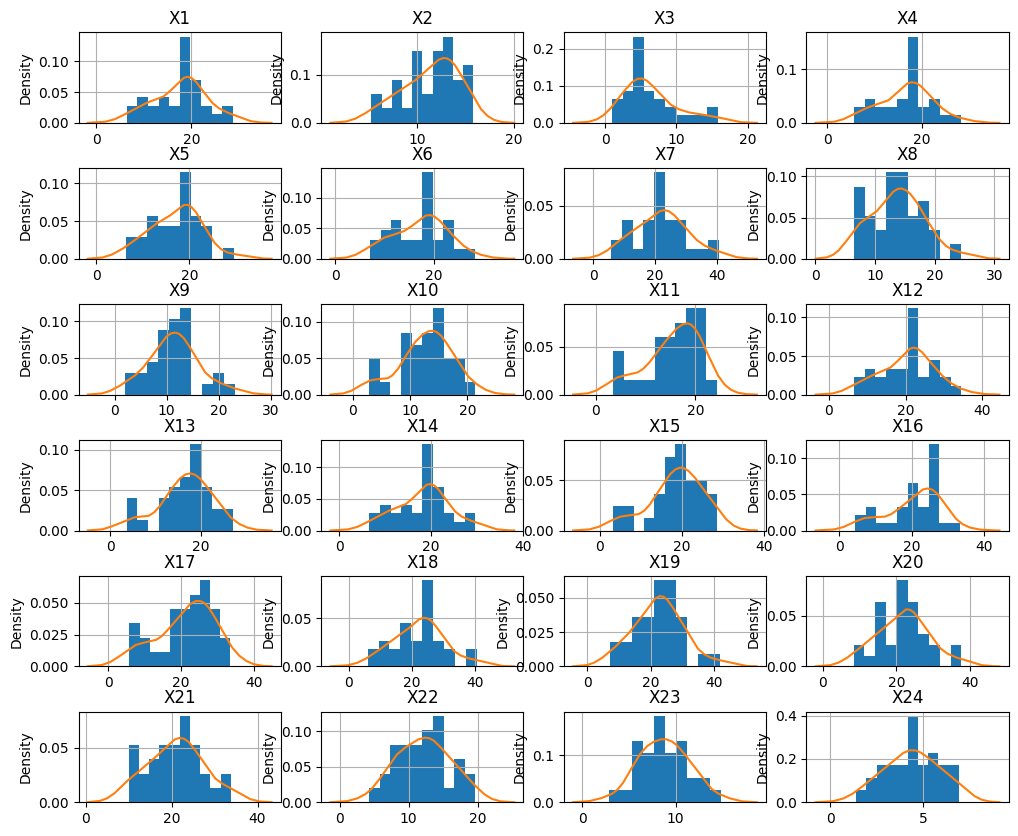

In [6]:
plt.style.use('fast')
fig, axs = plt.subplots(nrows=6, ncols=4, figsize=(12,10))
plt.subplots_adjust(hspace=0.5)
for ax, col in zip(axs.flat, df.columns):
    ax.hist(df[col], bins=10, density=True)
    sns.kdeplot(df[col], ax=ax)
    ax.grid(True)
    ax.set_title(col)
    ax.set_xlabel('')

Na podstawie wykresów możemy stwierdzić widoczną jednomodalność rozkładów, względną symetrię oraz różnice w obserwowanych spłaszczeniach krzywej. Dwie ostatnie obserwacje dodatkowo zweryfikujemy w dalszej części pracy.

### Statystyki opisowe


W tej części policzymy i zinterpretujemy statystyki opisowe naszego zbioru danych. Do podstawowych statystyk liczonych przez pakiet Pandas dodaliśmy obliczoną [skośność](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html#scipy.stats.skew) i [kurtozę](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html).

In [7]:
skewnesses = skew(new_df, axis=0)
kurtosises = kurtosis(new_df, axis=0)
stats = pd.concat([new_df.describe(), pd.DataFrame({'skewness':skewnesses, 'kurtosis':kurtosises}, index=new_df.columns).T]).T
stats['coef_of_var'] = stats['std'] / stats['mean']
stats

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis,coef_of_var
X1,32.0,17.671875,5.471052,6.4,14.400,18.55,20.600,28.7,-0.181180,-0.376567,0.309591
X2,32.0,11.371875,2.807505,5.3,9.775,11.95,13.350,15.8,-0.537643,-0.600688,0.246881
X3,32.0,6.321875,3.664189,1.0,4.075,5.40,7.900,15.8,1.009990,0.445025,0.579605
X4,32.0,17.065625,5.375188,5.6,14.250,17.70,20.650,28.3,-0.291134,-0.385678,0.314972
X5,32.0,17.533125,5.453888,6.3,13.400,18.45,21.125,29.6,-0.204242,-0.382600,0.311062
X6,32.0,17.613750,5.335404,7.1,13.300,18.65,21.425,28.3,-0.295805,-0.666051,0.302911
X7,32.0,22.078125,8.239274,5.9,16.400,22.65,26.650,40.6,0.131496,-0.324088,0.373187
X8,32.0,13.665625,4.312144,6.5,11.225,13.85,16.500,24.4,0.191824,-0.259796,0.315547
X9,32.0,11.350000,4.700309,1.9,8.450,10.75,13.875,23.1,0.211525,0.215907,0.414124
X10,32.0,12.681250,4.506228,2.9,10.175,13.20,15.725,21.4,-0.516804,-0.003552,0.355346


Na podstawie powyższych wyników zaobserwować możemy, jak kształtują się takie statystyki jak średnia, poszczególne kwartyle, wartości minimalne czy też maksymalne.

Warto zauważyć, iż najmniejszy średni procent palących występuje wśród osób mających więcej niż 75 lat oraz wśród osób palących więcej niż 20 papierosów dziennie, za to największy średni procent palących występuje wśród osób z przedziału wiekowego 45-54 lata.

Współczynnik zmienności dla każdej ze zmiennych waha się w okolicach 0,3. Najmniejsze odchylenie w stosunku do średniej występuje dla zmiennej $X_2$ (procent palących mniej niż 20 papierosów na dzień), zaś największe dla zmiennej $X_3$ (procent palących więcej niż 20 papierosów na dzień).

Dla dziesięciu zmiennych:
- $X_3$ (Procent palących więcej niż 20 papierosów na dzień),
- $X_7$ (Procent palących mężczyzn),
- $X_8$ (Procent palących kobiet),
- $X_9$ (Procent palących z przedziału wiekowego 15-19 lat),
- $X_{18}$ (Procent palących z przedziału wiekowego 35-44 lat),
- $X_{19}$ (Procent palących z przedziału wiekowego 45-54 lat),
- $X_{20}$ (Procent palących z przedziału wiekowego 45-64 lat),
- $X_{21}$ (Procent palących z przedziału wiekowego 55-64 lat),
- $X_{22}$ (Procent palących z przedziału wiekowego 65-74 lat),
- $X_{23}$ (Procent palących posiadających co najmniej 65 lat),

współczynnik asymetrii (skośność) jest większy od zera. Świadczy to o asymetrii prawostronnej rozkładu badanych cech, inaczej możemy powiedzieć, że większość państw dla danej zmiennej posiada procent palących mniejszy niż wartość średnia. Dla pozostałych zmiennych mamy odwrotną sytuację (rozkład badanych cech cechuje się asymetrią lewostronną).

Dla zmiennych:
- $X_3$ (Procent palących więcej niż 20 papierosów na dzień),
- $X_9$ (Procent palących z przedziału wiekowego 15-19 lat),
- $X_{13}$ (Procent palących z przedziału wiekowego 18-24 lat),
- $X_{15}$ (Procent palących z przedziału wiekowego 20-24 lat),
- $X_{19}$ (Procent palących z przedziału wiekowego 45-54 lat),


wskaźnik kurtozy wyszedł większy od zera, co oznacza, że rozkłady wyżej wspomnianych cech są rozkładami leptokurtycznymi - znaczna część wyników jest podobna do siebie, a obserwacji znacznie różniących się od średniej jest mało. Dla pozostałych zmiennych kurtoza jest ujemna, co oznacza, że rozkład badanych jest rozkładem platykurtycznym - w danych możemy zaobserwować większą liczbę wyników skrajnych (znacznie oddalonych od średniej).


Poniżej skupimy większą uwagę ku samej kurtozie oraz skośności dla badanych cech.


**Weryfikacja skośności i kurtozy rozkładów zmiennych**

Obliczone statystyki skośności i kurtozy stanowią estymację parametrów z populacji, przy takiej małej liczebności każdej próby (n=32) dodatkowo obarczone znacznym błędem. Żeby poznać choć ogólny kształt tych rozkładów, skorzystamy z przedziałów ufności (zarówno dla kurtozy jak i skośności) skonstruowanych za pomocą nieparametrycznej metody Bootstrap. Wykorzystana zostanie zmodyfkiowana metoda Bootstrap, w której użyte zostaną zmodyfkowane przedziały ufności drugiego rzędu uzyskanych metodą BCa (Bias-Corrected and Accelerated). Różni się on od metody pierwszego rzędu tym, że używa innej niż percentyl miary do określania przedziałów oraz bierze pod uwagę skośność ponownie pobieranych prób i stara się estymować parametr dla rzeczywistej populacji, a nie owych prób. Więcej o tej metodzie [w tym artykule](https://www.tandfonline.com/doi/abs/10.1080/01621459.1987.10478409).

In [8]:
def skew_statistic(data):
    return skew(data, axis=0)

def kurtosis_statistic(data):
    return kurtosis(data, axis=0)

data = (new_df.values[i] for i in range(new_df.shape[1]))
def bootstrap_for_xses(df, statistic, n_resamples=1000):
    skewness_mean = np.zeros(df.shape[1])
    kurtosis_mean = np.zeros(df.shape[1])
    skewness_intervals = np.zeros((df.shape[1], 2))
    kurtosis_intervals = np.zeros((df.shape[1], 2))
    for column in range(df.shape[1]):
        data = (df.values[column],)
        skewness_bootstrap = bootstrap(data=data, statistic=skew_statistic, n_resamples=n_resamples, confidence_level=.9)
        kurtosis_bootstrap = bootstrap(data=data, statistic=kurtosis_statistic, n_resamples=n_resamples, confidence_level=.9)
        skewness_mean[column] = np.mean(skewness_bootstrap.bootstrap_distribution)
        kurtosis_mean[column] = np.mean(kurtosis_bootstrap.bootstrap_distribution)
        skewness_intervals[column, :] = np.array(tuple(skewness_bootstrap.confidence_interval))
        kurtosis_intervals[column, :] = np.array(tuple(kurtosis_bootstrap.confidence_interval))

    return skewness_mean, kurtosis_mean, skewness_intervals, kurtosis_intervals



s, k, s_i, k_i = bootstrap_for_xses(new_df, skew_statistic, n_resamples=5000)

Skonstruowane przedziały liczymy dla każdej zmiennej, przy użyciu 5000 ponownych próbkowań. Jako, że każda zmienna ma 32 wartości, to możliwa liczba wszystkich kombinacji losowania ze zwracaniem to około (dla niepowtarzających się wartości) $32^{32}$. Nie jest to zatem dużo próbkowań, a w metodzie Bootstrap nie tyle ten parametr jest najistotniejszy w zawężaniu przedziałów, co rozmiar próby, który w naszym przypadku jest ograniczony przez liczbę państw w badaniu (a i również obecnych w Europie). Zdecydowaliśmy się na kompromis w zakresie poziomu ufności, który dla uzyskania niezbyt szerokich przedziałów, ale dalej wysokiej pewności ustaliliśmy w obu przypadkach na 90%.

Następnie zbudujemy funkcję, która dla obliczonych poziomów średnich liczonych statystyk oraz przedziałów ufności będzie rysować wykres, gdzie pionowa linia to zakres przedziału, który z prawdopodobieństwem 90% pokrywa szukany parametr, a punkt oznacza wyestymowaną metodą Bootstrap wartość szukanej statystyki.

In [9]:
def plot_statistic(statistic, confidence_intervals, name='statystyki', conf_level=.9):
    fig, ax = plt.subplots(figsize=(10,8))
    for i in range(statistic.shape[0]):
        plt.vlines(i, confidence_intervals[i,0], confidence_intervals[i,1], color='gray', zorder=0)
    ax.scatter(np.arange(statistic.shape[0]), statistic, color='black', zorder=1)
    plt.grid(False)
    plt.axhline(0, linestyle='--', alpha=0.5)
    ax.set_xticks(np.arange(statistic.shape[0]), labels=[f"X_{j}" for j in range(1, statistic.shape[0]+1)], rotation=45)
    ax.set_ylabel(name)
    plt.title(f"Średnia {name}, wraz z przedziałem ufności na poziomie ufności {conf_level}")




Przyjęta koncpecja zakłada, że skośność równa 0 oznacza skośność rozkładu normalnego (symetryczna), gdzie wartości mniejsze od 0 oznaczają rozkład lewostronnie asymetryczny, a większe od 0 oznaczają rozkład prawostronnie symetryczny. W przypadku kurtozy skorzystaliśmy z definicji Fishera -  kurtoza równa 0 to spłaszczenie rozkładu charakterystyczne dla rozkładu normalnego, większa od 0 oznacza rozkład leptokurtyczny, a mniejsza od 0 rozkład platykurtyczny.

**Wykres dla skośności**

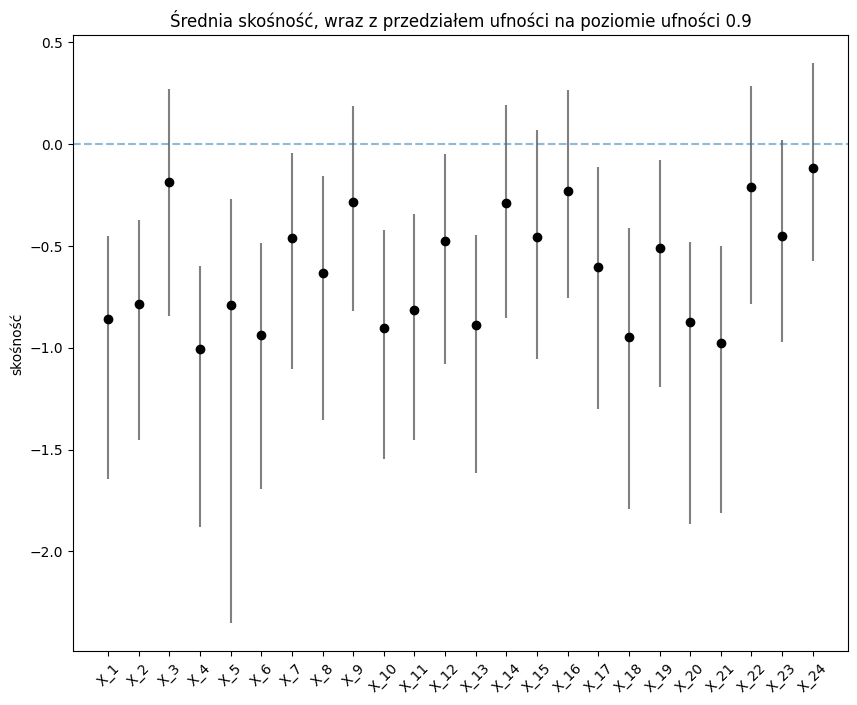

In [10]:
plot_statistic(s, s_i, name="skośność")

**Wykres dla kurtozy**

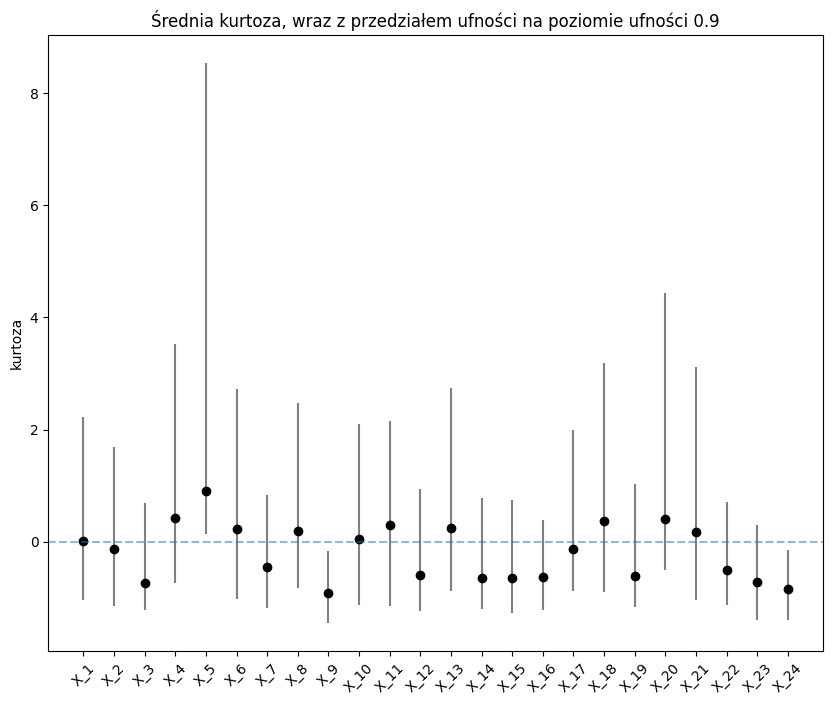

In [11]:
plot_statistic(k, k_i, name="kurtoza")

Z uwagi na bardzo małą wielkość każdej z prób (n=32), estymacje otrzymane za pomocą Bootstrap nie są zbyt wiarygodne, ale pokazują że dane często nie są istotnie różne od rozkładu normalnego (częste pokrywanie wartości kurtozy i skośności równej 0).

# Opis metod

### Standaryzowanie zmiennych

W tym kroku wykonamy standaryzację zmiennych w celu przygotowania do analizy skupień. Dokonamy standaryzacji zmiennych, aby skala cechy nie wpływała na jej udział w klastrze. Standaryzacja zostanie wykonana za pomocą obiektu klasy [sklearn.preprocessing.Standard Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler), który stosuje wzór:

$$X_i^* = \frac{X_i - E(X_i)}{\sqrt{D^2(X_i)}}$$



In [12]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(new_df)

In [13]:
scaled_df = pd.DataFrame(scaled_df, index=new_df.index, columns=new_df.columns)
final_df = scaled_df.copy()

### Redukcja wymiarów

Przygotujemy również dane za pomocą algorytmu Prinicipal Component Analysis do wyświetlenia na płaszczyźnie dwuwymiarowej, żeby lepiej móc obserwować efekty klastrowania. Jako, że nie jest to temat naszej pracy, więcej informacji na temat tej metody można znaleźć [tutaj](https://en.wikipedia.org/wiki/Principal_component_analysis). Nasz projekt wykorzystał implementację tego algorytmu pod postacią obiektu klasy [sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), gdzie liczba składowych została ustawiona (w celach wizualizacji) na 2, a [rozkład według wektorów osobliwych](https://pl.wikipedia.org/wiki/Rozk%C5%82ad_wed%C5%82ug_warto%C5%9Bci_osobliwych) został dokonany metodą LAPACK (metodą, której korzenie sięgają języka Fortran).

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
dim_reduced_df = pca.fit_transform(final_df)

### Wyświetlanie wyników

Poniżej przygotowaliśmy funkcję, której zastosowanie w prezentowaniu wyników jest szerokie:
    - w przypadku braku podziałów (brak dostraczonych "predykcji" przynależności do klastra) nie wyświetla tytułu i nie nadaje wyróżniających kolorów punktom
    - w przypadku dostarczonych predykcji, nadaje tytuł wyjaśniający jaka metoda została użyta, dla ilu klastrów oraz na koniec koloruje punkty zgodnie z przynależnością do klastra.

In [15]:
def plot_results(df_dim_2, title='', cluster_preds=np.array([])):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
    plt.style.use('dark_background')
    if cluster_preds.size:
        ax.set_title(f"Podział obiektów według metody {title}, liczba klastrów = {np.unique(cluster_preds).shape[0]}")
        ax.scatter(dim_reduced_df[:, 0], dim_reduced_df[:, 1], c=cluster_preds, cmap='cool')
    else:
        ax.scatter(dim_reduced_df[:, 0], dim_reduced_df[:, 1])
    for num, country in enumerate(final_df.index):
        plt.text(dim_reduced_df[num, 0], dim_reduced_df[num,1], country)

Poniżej wyniki redukcji wymiarów metodą PCA na naszym zbiorze danych:

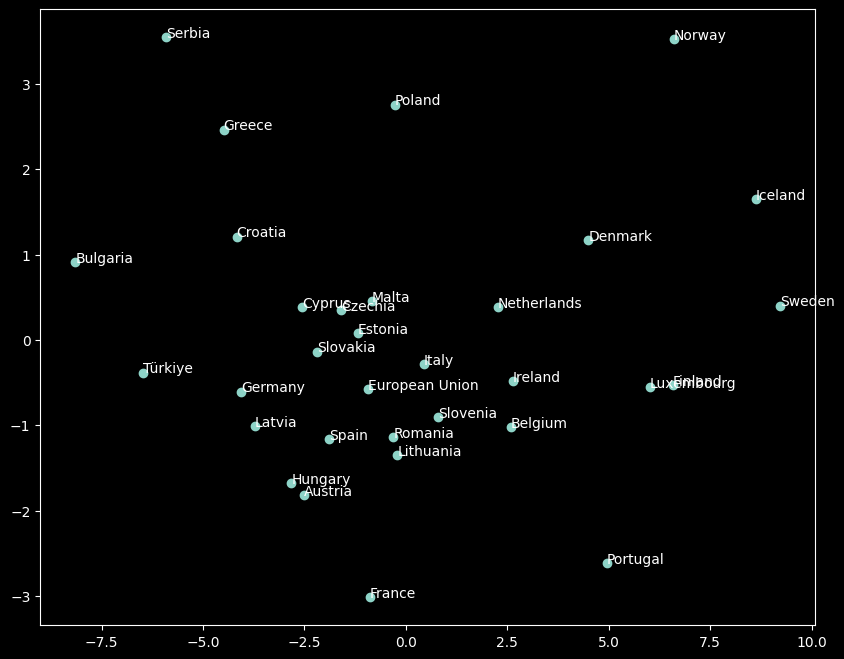

In [37]:
plot_results(dim_reduced_df)

**Zastosowanie przykładowych modeli klastrujących.**


W tej sekcji pokażemy zastosowanie kilku wybranych algorytmów z biblioteki [sklearn.cluster](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster) na naszych danych.

In [17]:
import sklearn.cluster as cl
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

### Miary jakości klastrowania

W obliczu takiej mnogości metod oraz tak dużej liczby kombinacji hyperparametrów, musieliśmy skorzystać z obiektywnych miar jakości klastrowania. Skorzystaliśmy z tych dostępnych w pakiecie [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics). \
Są to:
1. Silhouette Coefficient - miara jakości klastrowania, która mierzy dopasowanie obiektów do ich klastrów oraz ich odległość do innych klastrów. Więcej na temat tej miary można poczytać [na artykule na Wikipedii](https://en.wikipedia.org/wiki/Silhouette_(clustering)) lub [u źródła](https://www.sciencedirect.com/science/article/pii/0377042787901257). Współczynnik przyjmuje wartości z przedziału $[-1,  1]$, gdzie im wyższy współczynnik, tym lepsza jakoś klastrowania.
2. Caliński-Harabasz Index - miara jakości klastrowania, która mierzy rozdzielność klastrów. Wyznacza się ją jako stosunek sumy wariancji międzyklastrowej do sumy wariancji wewnątrzklastrowej. Przyjmuje wartości z przedziału $[0, +\infty)$, gdzie wyższe wartości oznaczają, że klastry są bardziej gęste i lepiej oddzielone od siebie. Więcej na temat tej metody w [artykule](https://www.tandfonline.com/doi/abs/10.1080/03610927408827101)
3. Davies-Bouldin Index - miara jakości klastrowania, która mierzy podobieństwo klastrów. Wyznacza się ją jako średnią wartość indeksu Davies-Bouldina dla wszystkich klastrów. Przyjmuje wartości z przedziału $[0, +\infty)$, im wyższa wartość miary, tym mniejsze podobieństwo klastrów. Więcej szczegółów w tym [artykule](https://ieeexplore.ieee.org/document/4766909)

### Funkcja do klastrowania

Przygotowaliśmy funkcję, której działanie jest podstawą naszej analizy. Możemy wybrać tryb kreślenia wykresu (plot=True), gdzie metoda klastrowania zostanie zastosowana na danych, wypisane zostaną miary jakości klatrowania (ale nie zwrócone) oraz wykres punktowy za pomocą funkcji *plot_results* zostanie wykonany. W przypadku flagi plot z wartością False, zostaną po prostu zwrócone wartości miar wymienonych w poprzednim punkcie dla danej metody.

In [18]:
def fit_and_show(model, name='', plot=True):
    results = model.fit_predict(final_df)
    if plot:
        plot_results(final_df, name, results)
        print(f"Silhouette Coef: {silhouette_score(final_df, results)}")
        print(f"Calinski-Harabasz Index: {calinski_harabasz_score(final_df, results)}")
        print(f"Davies-Bouldin Index: {davies_bouldin_score(final_df, results)}")
        return
    return silhouette_score(final_df, results), calinski_harabasz_score(final_df, results), davies_bouldin_score(final_df, results)

## Dobór najlepszej metody klatrującej i odpowiedniej liczby klastrów.


W poprzedniej sekcji widzieliśmy działanie przykładowych modeli klastrujących na naszym zbiorze danych. W tej sekcji za pomocą trzech indeksów (wprowadzonych wcześniej) wybierzemy najlepszą metodę z większości dostępnych w pakiecie *sklearn.cluster*. Dobierzemy również odpowiednie hyperparametry liczby klastrów. Dobór będzie oparty o trzy wymienione wcześniej wskaźniki.


### Użyte metody

Wykorzystane algorytmy to większość z dostępnych w ramach pakietu [sklearn.cluster](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster) oraz metodę [sklearn.mixture.GaussianMixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture).

Lista wraz z krótszym opisem metod:
- [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) - metoda hierarchiczna, która łączy obiekty w klastry w oparciu o ich odległość. Można użyć różnych metryk odległości. W naszym przypadku użyjemy metody Warda.
- [Birch](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html) - metoda hierarchiczna, która wykorzystuje drzewo decyzyjne do tworzenia klastrów.
- [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) - metoda niehierarchiczna, która przypisuje obiekty do klastrów w oparciu o ich odległość od ich najbliższego centrum klastra (tzw. centroida).
- [BisectingKMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.BisectingKMeans.html) - rozszerzenie metody KMeans, która dzieli zbiory na klastry w sposób iteracyjny.
- [MiniBatchKMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html) - wersja metody KMeans, która wykorzystuje minipakiety danych do obliczania centrów klastrów, jest ona szybsza od klasycznej, ale mniej dokładna.
- [SpectralClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html) - technika mająca swoje korzenie w teorii grafów, w której to podejście jest wykorzystywane do identyfikowania społeczności węzłów w grafie na podstawie łączących je krawędzi.
- [GaussianMixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) - metoda probabilistyczna, która zakłada, że dane pochodzą z mieszaniny rozkładów Gaussa.

Poniżej lista zaimportowanych modeli:

In [19]:
import sklearn.cluster as cl
from sklearn.mixture import GaussianMixture

In [20]:
models = [cl.AgglomerativeClustering, cl.Birch, cl.KMeans, cl.BisectingKMeans, cl.MiniBatchKMeans, cl.SpectralClustering, GaussianMixture]

Przygotujemy multindex, żeby móc zapisać każdej metodzie wartości trzech indeksów.

In [21]:
import itertools
index = [np.array(list(itertools.chain.from_iterable([[model_name.__name__]*3 for model_name in models]))), np.array(['Silhouette Coef', 'Calinski-Harabasz Index', 'Davies-Bouldin Index'] * len(models))]
results = pd.DataFrame(np.zeros((index[0].shape[0], 9)), index=index, columns=np.arange(2, 11)) #inicjujemy pusty DataFrame na wyniki


Liczymy wartości miar dla wszystkich metod, z różnymi liczbami klastrów (od 2 do 11).

In [22]:
for num_clasters in range(2, 11):
    for model in models:
        try:
            sc, chi, dbi = fit_and_show(model(n_clusters=num_clasters), plot=False)
        except Exception as e:
            sc, chi, dbi = fit_and_show(model(n_components=num_clasters), plot=False)
        results.loc[(model.__name__, 'Silhouette Coef'), num_clasters] = sc
        results.loc[(model.__name__, 'Calinski-Harabasz Index'), num_clasters] = chi
        results.loc[(model.__name__, 'Davies-Bouldin Index'), num_clasters] = dbi



# Rezultaty

Poniższy DataFrame przedstawia dla każdej użytej metody klastrowania wyliczone trzy wcześniej wspomniane miary jakości klastrowania, wraz ze zmieniającą się liczbą klastrów:

In [23]:
results

2          3   \
AgglomerativeClustering Silhouette Coef           0.467550   0.360764   
                        Calinski-Harabasz Index  32.295371  30.567517   
                        Davies-Bouldin Index      0.699866   0.872827   
Birch                   Silhouette Coef           0.467550   0.360764   
                        Calinski-Harabasz Index  32.295371  30.567517   
                        Davies-Bouldin Index      0.699866   0.872827   
KMeans                  Silhouette Coef           0.453253   0.321115   
                        Calinski-Harabasz Index  37.242326  31.382767   
                        Davies-Bouldin Index      0.782450   0.978571   
BisectingKMeans         Silhouette Coef           0.453253   0.337302   
                        Calinski-Harabasz Index  37.242326  30.926591   
                        Davies-Bouldin Index      0.782450   0.983394   
MiniBatchKMeans         Silhouette Coef           0.453253   0.321115   
                        Calinski-Harabasz Index  37.242326  31.382767   
                        Davies-Bouldin Index      0.782450   0.978571   
SpectralClustering      Silhouette Coef           0.399919   0.343277   
                        Calinski-Harabasz Index  12.957842  14.937617   
                        Davies-Bouldin Index      0.624935   0.815005   
GaussianMixture         Silhouette Coef           0.453253   0.359326   
                        Calinski-Harabasz Index  37.242326  31.000626   
                        Davies-Bouldin Index      0.782450   0.933822   

                                                        4          5   \
AgglomerativeClustering Silhouette Coef           0.231688   0.209568   
                        Calinski-Harabasz Index  26.463591  22.389027   
                        Davies-Bouldin Index      1.041464   1.190731   
Birch                   Silhouette Coef           0.231688   0.209568   
                        Calinski-Harabasz Index  26.463591  22.389027   
                        Davies-Bouldin Index      1.041464   1.190731   
KMeans                  Silhouette Coef           0.294633   0.250792   
                        Calinski-Harabasz Index  26.880599  22.748891   
                        Davies-Bouldin Index      1.018912   0.990343   
BisectingKMeans         Silhouette Coef           0.247261   0.156553   
                        Calinski-Harabasz Index  25.979891  21.505851   
                        Davies-Bouldin Index      1.067622   1.459229   
MiniBatchKMeans         Silhouette Coef           0.263097   0.266701   
                        Calinski-Harabasz Index  23.299768  22.587305   
                        Davies-Bouldin Index      1.106562   0.966302   
SpectralClustering      Silhouette Coef           0.038366   0.094384   
                        Calinski-Harabasz Index  10.594813  13.272259   
                        Davies-Bouldin Index      1.155908   1.120455   
GaussianMixture         Silhouette Coef           0.261246   0.206213   
                        Calinski-Harabasz Index  26.641290  23.227905   
                        Davies-Bouldin Index      1.047165   1.198011   

                                                        6          7   \
AgglomerativeClustering Silhouette Coef           0.191852   0.185058   
                        Calinski-Harabasz Index  20.433568  18.787742   
                        Davies-Bouldin Index      1.232915   1.243733   
Birch                   Silhouette Coef           0.191852   0.185058   
                        Calinski-Harabasz Index  20.433568  18.787742   
                        Davies-Bouldin Index      1.232915   1.243733   
KMeans                  Silhouette Coef           0.185422   0.188387   
                        Calinski-Harabasz Index  19.689225  19.415819   
                        Davies-Bouldin Index      1.093544   1.076732   
BisectingKMeans         Silhouette Coef           0.104038   0.116359   
                        Calinski-Haraba

Obiecującą metodą jest K-Means dla dwóch klastrów, która ma wysoki współczynnik Silhouette Coefficient, bardzo wysoki wskaźnik Calinski-Harabasz Index i Davies-Bouldin Index na dość wysokim poziomie. Wyświetlone zatem zostaną wyniki tej metody. Jeżeli chcielibyśmy uzyskać rozwiązanie dla 3 klastrów, też należy korzystać z metody k-średnich.

Silhouette Coef: 0.45325266682675536
Calinski-Harabasz Index: 37.24232575602608
Davies-Bouldin Index: 0.7824495979443283


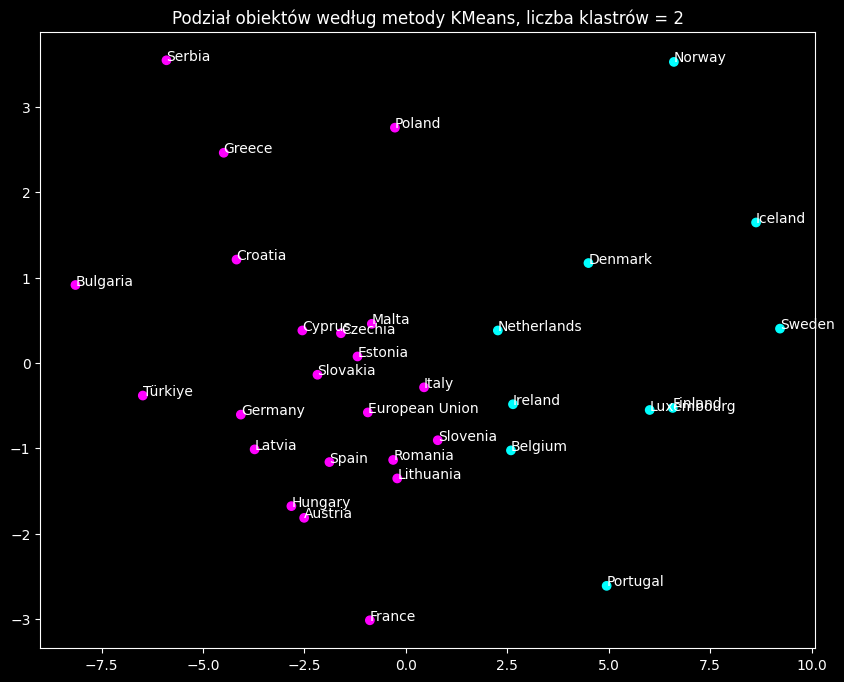

In [24]:
fit_and_show(cl.KMeans(n_clusters=2), plot=True, name='KMeans')

Silhouette Coef: 0.33445736726461694
Calinski-Harabasz Index: 31.561392651655716
Davies-Bouldin Index: 0.9471296655329985


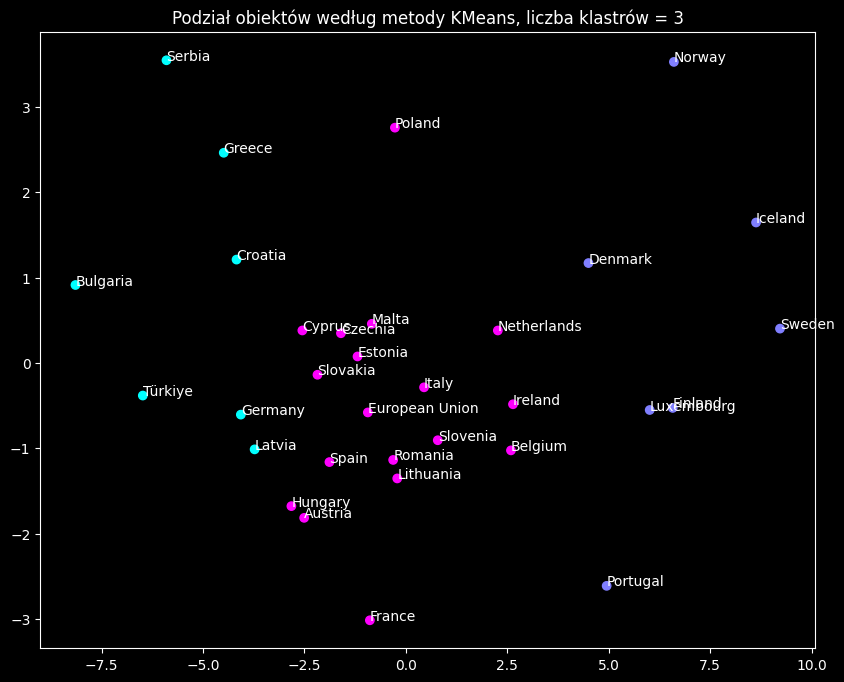

In [25]:
fit_and_show(cl.KMeans(n_clusters=3), plot=True, name='KMeans')

Uzyskane podziały sugerują zgodne z odczuciami empirycznymi wnioski.

Dla podziału na dwa skupienia:
Europa w swoich zwyczajach związanych z paleniem podzieliła się na grupy:
- mało palące: cała Skandynawia, wszystkie kraje Beneluxu, Portugalia, Irlandia i Anglia
- palące częściej: reszta krajów

Dla podziału na trzy skupienia (który, jak wynika z obliczonych miar jest gorszy):
- kraje najmniej palące: cała Skandynawia wraz z Portugalią, Anglią i Luxemburgiem dalej w oddzielnym skupieniu
- kraje umiarkowanie palące: kraje Europy środkowej i większość krajów zachodu (bez Niemiec)
- kraje mające większe skłonności do palenia: kraje bałkańskie, Grecja, Turcja, Niemcy oraz Łotwa

## Weryfikacja uzyskanych podziałów

W tej części ocenimy jak kształtują się wartości zmiennych w wybranych skupieniach.

In [26]:
m2 = cl.KMeans(n_clusters=2) # model dla dwóch klastrów
m3 = cl.KMeans(n_clusters=3) # model dla trzech klastrów
# przypisanie labeli
division_for_2 = m2.fit_predict(final_df)
division_for_3 = m3.fit_predict(final_df)

### Podział na dwa klastry

**klaster 1**

In [27]:
list(new_df[division_for_2 == 0].index)

['Belgium',
 'Denmark',
 'Ireland',
 'Luxembourg',
 'Netherlands',
 'Portugal',
 'Finland',
 'Sweden',
 'Iceland',
 'Norway']

In [28]:
new_df[division_for_2 == 0].describe().mean(axis=1)

count    10.000000
mean     10.226250
std       3.338985
min       5.104167
25%       8.048958
50%      10.341667
75%      12.741667
max      14.929167
dtype: float64

**klaster 2**

In [29]:
list(new_df[division_for_2 == 1].index)

['European Union',
 'Bulgaria',
 'Czechia',
 'Germany',
 'Estonia',
 'Greece',
 'Spain',
 'France',
 'Croatia',
 'Italy',
 'Cyprus',
 'Latvia',
 'Lithuania',
 'Hungary',
 'Malta',
 'Austria',
 'Poland',
 'Romania',
 'Slovenia',
 'Slovakia',
 'Serbia',
 'Türkiye']

In [30]:
new_df[division_for_2 == 1].describe().mean(axis=1)

count    22.000000
mean     19.056061
std       3.546998
min      13.495833
25%      16.747917
50%      18.468750
75%      20.954792
max      27.600000
dtype: float64

Klaster z krajami północnymi rzeczywiście odznacza się prawie dwukrotnie mniejszym średnim poziomem statystyk związanych z paleniem niż klaster, który określiliśmy jako kraje częściej palące.

### Podział na trzy klastry

**klaster 1**

In [31]:
list(new_df[division_for_3 == 0].index)

['Denmark', 'Luxembourg', 'Portugal', 'Finland', 'Sweden', 'Iceland', 'Norway']

In [32]:
new_df[division_for_3 == 0].describe().mean(axis=1)

count     7.000000
mean      8.836905
std       2.795625
min       5.104167
25%       7.068750
50%       8.758333
75%      10.533333
max      12.791667
dtype: float64

Widzimy że w tym klastrze średnia wszystkich zmiennych (które związane są z częstością palenia) wynosi 8.83%.

**klaster 2**

In [40]:
list(new_df[division_for_3 == 1].index)

['European Union',
 'Belgium',
 'Czechia',
 'Estonia',
 'Ireland',
 'Spain',
 'France',
 'Italy',
 'Lithuania',
 'Hungary',
 'Malta',
 'Netherlands',
 'Austria',
 'Poland',
 'Romania',
 'Slovenia',
 'Slovakia']

In [41]:
new_df[division_for_3 == 1].describe().mean(axis=1)

count    17.000000
mean     16.737990
std       2.762891
min      11.879167
25%      15.016667
50%      16.929167
75%      18.225000
max      21.820833
dtype: float64

W klastrze, w którym spodziewaliśmy się zobaczyć większy udział palenia, rzeczywiście średnia zmiennych związanych ze zjawiskiem palenia jest prawie dwa razy większa.

**klaster 3**

In [42]:
list(new_df[division_for_3 == 2].index)

['Bulgaria',
 'Germany',
 'Greece',
 'Croatia',
 'Cyprus',
 'Latvia',
 'Serbia',
 'Türkiye']

In [43]:
new_df[division_for_3 == 2].describe().mean(axis=1)

count     8.000000
mean     21.886458
std       3.172651
min      17.829167
25%      19.867708
50%      21.479167
75%      23.447917
max      27.233333
dtype: float64

Klaster, który podejrzewaliśmy o największe skłonności do palenia wśród obywateli, rzeczywiście ma średnią wartość zmiennych wyższą od poprzedniego (określanego jako umiarkowany).

Analizy te nie miały na celu pogłębionego badania zjawiska palenia w klastrach, a zweryfikować powierzchowną zgodność zachowań zjawisk w wydzielonych klastrach. Okazało się, że nasza intuicja co do podziałów jest jak najbardziej uzasadniona.

# Podsumowanie

Widzimy, że zastosowane różne metody klastrowania dały podobne rezultaty.

Dla metody k-średnich współczynnik Silhouette oraz indeksy Calinski-Harabasz i Davies-Bouldin dały jednoznaczny werdykt - podział próby na 2 klastry będzie rozwiązaniem optymalnym oraz wszystkie te trzy mierniki jednocześnie będą na wysokim poziomie. Dzięki tym wskaźnikom można było stwierdzić, że metody te, będą jednymi z lepszych do przeprowadzenia analizy.

To wszystko wskazuje nam, że cel, jakim był podział obiektów (krajów Europy) na skupienia, został zrealizowany pomyślnie. Kraje o dużym odsetku palących zostały odseparowane od krajów, w których odsetek palaczy nie przyjmuje tak dużych wartości.

Wyniki naszego badania różnią się od wyników badania literaturowego. Najbardziej zaskakującym faktem jest różnica we wskaźnikach śmiertelności kobiet. W badaniu literaturowym kraje z najwyższymi wskaźnikami to były w dużej mierze kraje północnej Europy. W naszym badaniu kraje te wykazały przynależność do klastra krajów mniej palących.

Wyniki badania literaturowego dla mężczyzn też nie są zbieżne z wynikami naszej analizy. Idąc za naszym badaniem spodziewalibyśmy się, że najwyższymi wskaźnikami śmiertelności będą charakteryzować się obywatele krajów południa Europy, a są to kraje Europy Środkowej.

Różnice wynikają przede wszystkim z faktu, że nasze badanie i badanie literaturowe nie badają stricte tego samego zjawiska. Wydawałoby się, że związek pomiędzy zjawiskiem samego palenia papierosów w kraju a spowodowaną przez nie śmiertelnością będzie wystarczająco silny. Okazało się jednak, że siła zależności między nawykiem a śmiertelnością nie jest na tyle duża, aby stwierdzić, że nawyk palenia papiersów w danym kraju jednoznacznie wpływa na śmiertelność z powodu palenia papierosów. Mogą na to wpływać inne czynniki nieuwzględnione w badaniu, zatem niezgodność wyników nie świadczy o niepoprawności badania. Jak sprawdziliśmy w naszej pracy uzyskane klastry charakteryzują się wyraźnie różnymi średnimi poziomami badanych zmiennych, co pozwala wnioskować o poprawności przeprowadzonych procedur analizy skupień.

# Bibliografia

1. World Health Organization - https://www.who.int/news-room/fact-sheets/detail/tobacco
2. ,,Smoking epidemic in Europe in the 21st century", F. Janssen, Shady El Gewily, Anastasios Bardoutsos - https://pubmed.ncbi.nlm.nih.gov/32769210/
3. Wikipedia ,,Kernel density estimation" - https://en.wikipedia.org/wiki/Kernel_density_estimation
4. ,,Bootstrap Confidence Intervals and Bootstrap Approximations", T. Diciccio, R. Tibshirani - https://www.tandfonline.com/doi/abs/10.1080/01621459.1987.10478409
5. Wikipedia ,,Principal component analysis" - https://en.wikipedia.org/wiki/Principal_component_analysis
6. ,,Silhouettes: A graphical aid to the interpretation and validation of cluster analysis", Peter J. Rousseeuw - https://www.sciencedirect.com/science/article/pii/0377042787901257
7. ,,A dendrite method for cluster analysis", T. Caliński, J. Harabasz - https://www.tandfonline.com/doi/abs/10.1080/03610927408827101
8. ,,A Cluster Separation Measure", David L. Davies, Donald W. Bouldin - https://ieeexplore.ieee.org/document/4766909
